In [1]:
from joblib import register_parallel_backend, parallel_backend

# register_parallel_backend('threading')

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc




In [4]:
# # Class balance
def print_unique(values):
    unique, counts = np.unique(values, return_counts=True)

    for cls, cnt in zip(unique, counts):
        print("Class [%d] Count [%d]" % (cls, cnt))
        


In [5]:
import matplotlib.pyplot as plt

def view_histo(row, data):
    
#     print(row)
#     return
    hname = row["hname"]
    ls_number = row["lumi"]
    run_number = row["run"]
    is_good = row["good"]
    is_good_pixel = row["good_pixel"]
    
    plt.figure(figsize=(10, 5))
    plt.title("%s Run: %s LS: %s GLabel: %d PLabel %d" % (hname, run_number, ls_number, is_good, is_good_pixel))

    plt.plot(range(len(data)), data, drawstyle='steps-pre', label=hname)
    plt.legend()

In [46]:
class Clustering:
    
    def __init__(self):
        self.clustering = None
        self.df = None
        
    def load_data(self, filename):
        df = pd.read_csv(filename)
        print(df.shape)
        
        # Filter list of columns which will be used for training
        bin_cols = [col for col in df.columns if 'bin_' in col]

        # remove first and last values as those are over/under flows
        self.bin_cols = bin_cols[1:-1]
        
        # Drop empty rows
        df.drop(df[df.entries == 0].index, inplace=True)
        
        # Drop garbage
        df.drop(["Unnamed: 0", "Unnamed: 0.1", "fromrun.1", "fromlumi.1", "hname.1"], axis=1, inplace=True, errors="ignore")
        
        print(df.shape)
        
        self.df = pd.concat([self.df, df], ignore_index=True) if self.df is not None else df
            
        # Normalization, divide every bin value by total entries
        self.X = self.df.filter(self.bin_cols, axis=1).copy().div(self.df.entries, axis=0)

        self.y = self.df["good_pixel"]
        
        print("DF", self.df.shape)
    

hname = "chargeInner_PXLayer_1"

c = Clustering()
c.load_data("/home/mantydze/data/ZeroBias2017B/massaged/{hname}.csv".format(hname=hname))
c.load_data("/home/mantydze/data/ZeroBias2017D/massaged/{hname}.csv".format(hname=hname))

(28335, 120)
(27208, 115)
DF (27208, 115)
(28747, 115)
(27641, 115)
DF (54849, 115)


In [47]:
from sklearn.decomposition import PCA
import numpy as np
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

good_bad_colors=["red", "green", "orange"] # red is -1
cluster_colors = get_colors(100)

def do_pca(df_, X_):
    # import matplotlib.pyplot as plt

    pca = PCA(n_components=3)
    pcomp = pca.fit_transform(X_)

    print(pca.explained_variance_ratio_)

    plt.figure()
    plt.grid()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Variance (%)') #for each component
    plt.title('Explained Variance ratio')
    plt.show()
    
    df_["pcx"] = pcomp[:,0]
    df_["pcy"] = pcomp[:,1]
    
    plt.scatter(df_["pcx"], df_["pcy"], color=[good_bad_colors[i] for i in df_["good_pixel"]], label=df_["good_pixel"])
    plt.show()

In [48]:
from sklearn.manifold import MDS

def do_mds(df_, X_, labels_=None):
    
    mds = MDS(n_components=2)
    X_t = mds.fit_transform(X_)
    print(X_t.shape)
    
    df_["mdsx"] = X_t[:,0]
    df_["mdsy"] = X_t[:,1]
    
    if labels_:
        plt.scatter(df_["mdsx"], df_["mdsy"], color=[cluster_colors[i] for i in labels_])
        plt.show()
    
    plt.scatter(df_["mdsx"], df_["mdsy"], color=[good_bad_colors[i] for i in df_["good_pixel"]])
    plt.show()

[0.79456789 0.18183579 0.0114638 ]


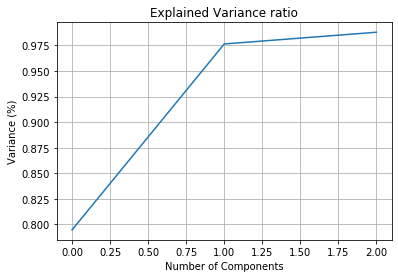

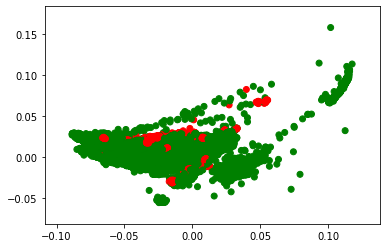

In [49]:
do_pca(c.df, c.X)

In [25]:

goods = [297308, 297425, 297293, 297050]
bads = [297179, 297180]
goods = [297050, 297056, 297057, 297099, 297100]#, 297101, 297113, 297114, 297175, 297176] #, 297177, 297178, 297215, 297218, 297219, 297224, 297225, 297227, 297292, 297293, 297296, 297308, 297359, 297411, 297424, 297425, 297426, 297429, 297430, 297431, 297432, 297433, 297434, 297435, 297467, 297468, 297469, 297483, 297484, 297485, 297486, 297487, 297488, 297503, 297504, 297505, 297557, 297558, 297562, 297563, 297599, 297603, 297604, 297605, 297606, 297620, 297656, 297665, 297666, 297670, 297674, 297675, 297722, 297723, 298996, 298997, 299000, 299042, 299061, 299062, 299064, 299065, 299067, 299096, 299149, 299178, 299180, 299184, 299185, 299327, 299329, 299368, 299369, 299370, 299380, 299381, 299394, 299395, 299396, 299420, 299443, 299450, 299477, 299478, 299479, 299480, 299481, 299593, 299594, 299595, 299597, 299649]
bads = [297046, 297047, 297048, 297049, 297168, 297169, 297170, 297171, 297179, 297180, 297181, 297211, 297281, 297282, 297283, 297284, 297285, 297286, 297287, 297288, 297289, 297290, 297291, 297495, 297496, 297497, 297498, 297499, 297501, 297502, 297662, 297663, 297664, 297671, 297672, 299316, 299317, 299318, 299324, 299325, 299326, 301086, 301665, 301912, 302646, 302660, 303948, 303989, 305249, 305250]
subdf = c.df.copy()
subdf = subdf[subdf["run"].isin(goods + bads)]
subX = subdf.filter(c.bin_cols, axis=1).copy().div(subdf.entries, axis=0)
suby = subdf["good_pixel"]

In [80]:
rs = np.random.RandomState()
subdf = c.df.sample(frac =.10, random_state=rs)
subX = subdf.filter(c.bin_cols, axis=1).copy().div(subdf.entries, axis=0)
suby = subdf["good"]

[0.79836717 0.17673439 0.01151914]


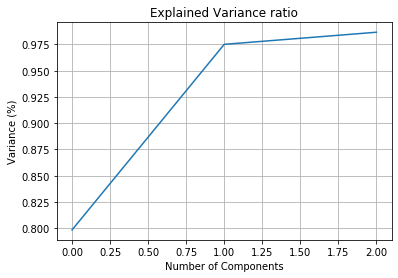

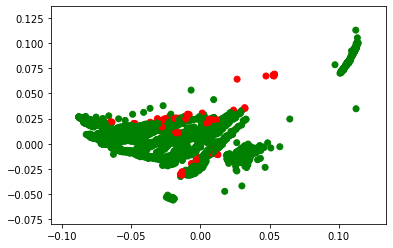

In [81]:
do_pca(subdf, subX)

In [82]:
# DBSCAN
from scipy.spatial.distance import jensenshannon
from sklearn.cluster import DBSCAN

with parallel_backend('loky'):
    c1 = DBSCAN(eps=0.03, min_samples=10, metric=jensenshannon, metric_params={"base":2}, n_jobs=4)
    c1.fit(subX)
    
print_unique(c1.labels_)
print()
print_unique(suby)


Class [-1] Count [111]
Class [0] Count [178]
Class [1] Count [2553]
Class [2] Count [2643]

Class [0] Count [375]
Class [1] Count [5110]


(1000, 2)


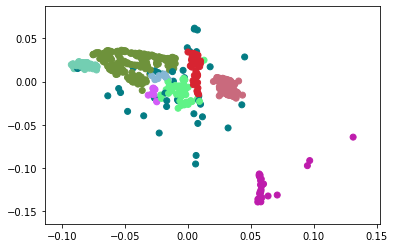

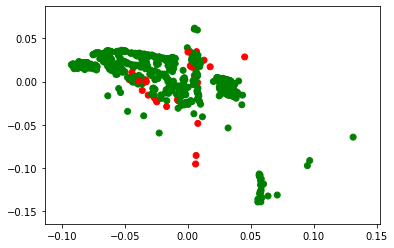

In [53]:
do_mds(subdf, subX, list(c1.labels_))

In [52]:
match = 0
for o, e in zip(c1.labels_, suby):
    if o == e:
        match += 1
#     print(o, e)
    
print(match)

1


0.08194082558848101


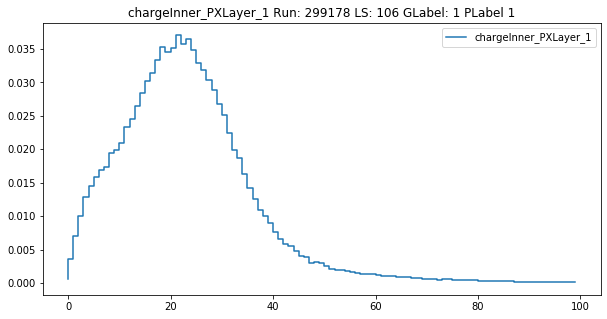

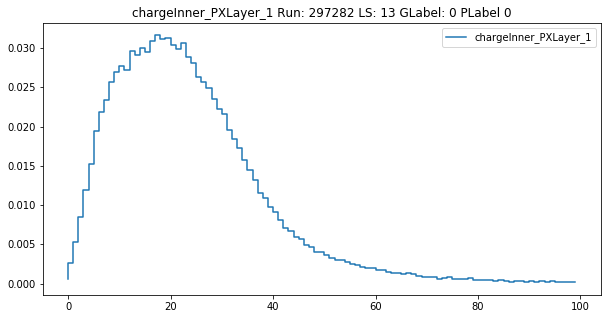

In [67]:
from scipy.spatial.distance import jensenshannon
from scipy import stats

pi = 2
qi = 28

# js_pq = jensenshannon(subX.iloc[pi], subX.iloc[qi], base=10)
# view_histo(subdf.iloc[pi], subX.iloc[pi])
# view_histo(subdf.iloc[qi], subX.iloc[qi])

js_pq = jensenshannon(c.X.iloc[pi], c.X.iloc[qi], base=2)
view_histo(c.df.iloc[pi], c.X.iloc[pi])
view_histo(c.df.iloc[qi], c.X.iloc[qi])
print(js_pq)

0.01424206567170145


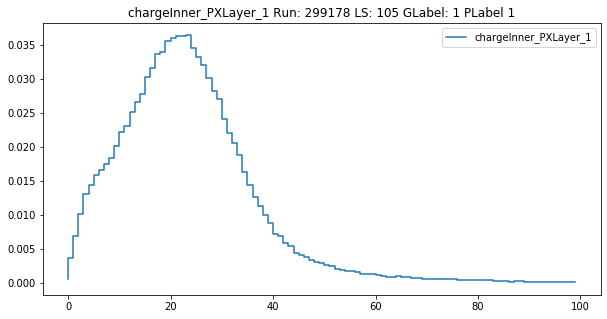

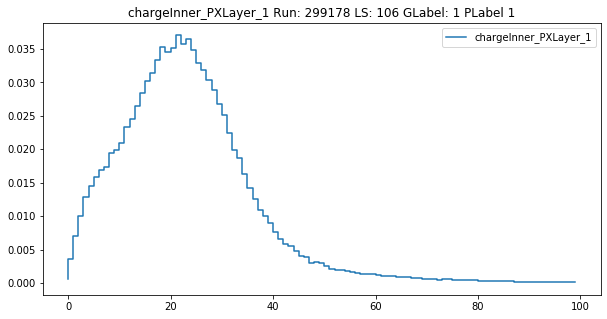

In [65]:
pi = 1
qi = 2
js_pq = jensenshannon(c.X.iloc[pi], c.X.iloc[qi], base=2)
view_histo(c.df.iloc[pi], c.X.iloc[pi])
view_histo(c.df.iloc[qi], c.X.iloc[qi])
print(js_pq)        

In [54]:
from sklearn.mixture import GaussianMixture

In [67]:
gm = GaussianMixture(n_components=2)
predy = gm.fit_predict(subX, suby)

for o, e in zip(predy, suby):
    print(o, e)

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
0 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0


In [ ]:
# KMeans
from sklearn.cluster import KMeans, SpectralClustering
from sklearn import metrics

sils = []
chss = []

for i in range(2, 20):
    km = SpectralClustering(n_clusters=i, random_state=1, affinity='nearest_neighbors')
    km.fit(c.X)
#     print_unique(km.labels_)
    labels = km.labels_
    
    sil = metrics.silhouette_score(c.X, labels, metric = 'euclidean')
    chs = metrics.calinski_harabasz_score(c.X, labels)
    
    sils.append(sil)
    chss.append(chs)
    print(i, sil, chs)
        

In [32]:
km.inertia_

1.6296415600415823

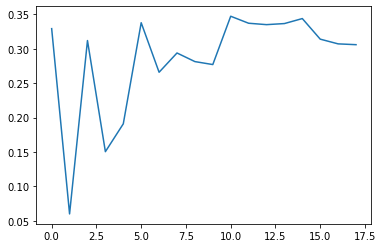

In [34]:
plt.plot(sils, label="sils")

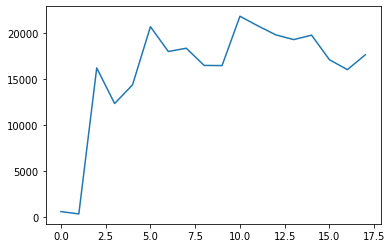

In [35]:
plt.plot(chss, label="chss")

In [4]:
# Histogram names to be trained
cipxl = ["chargeInner_PXLayer_1", "chargeInner_PXLayer_2", "chargeInner_PXLayer_3", "chargeInner_PXLayer_4"]
copxl = ["chargeOuter_PXLayer_1", "chargeOuter_PXLayer_2", "chargeOuter_PXLayer_3", "chargeOuter_PXLayer_4"]
spxl = ["size_PXLayer_1", "size_PXLayer_2", "size_PXLayer_3", "size_PXLayer_4"]
spxd = ["size_PXDisk_-3", "size_PXDisk_-2", "size_PXDisk_-1", "size_PXDisk_+1", "size_PXDisk_+2", "size_PXDisk_+3"]
cpxd = ["charge_PXDisk_-3", "charge_PXDisk_-2", "charge_PXDisk_-1", "charge_PXDisk_+1", "charge_PXDisk_+2", "charge_PXDisk_+3"]

hnames = cipxl + copxl + spxl + spxd + cpxd
hnames = ["chargeInner_PXLayer_1"]

In [6]:
results = {}

for index, hname in enumerate(hnames):
    print(index+1, "/", len(hnames), hname)
    
    filename = "/home/mantydze/data/ZeroBias2017B/massaged/{hname}.csv".format(hname=hname)
    
    rft = RandomForestTrain()
    rft.load_data(filename)
    rft.train_eval(verbose=False)


1 / 24 chargeInner_PXLayer_1
(28335, 120)
(27208, 120)
Mean ACC 0.987 std 0.002
Mean AUC 0.976 std 0.006

2 / 24 chargeInner_PXLayer_2
(28335, 120)
(27208, 120)
Mean ACC 0.986 std 0.002
Mean AUC 0.958 std 0.009

3 / 24 chargeInner_PXLayer_3
(28335, 120)
(27208, 120)
Mean ACC 0.964 std 0.003
Mean AUC 0.829 std 0.018

4 / 24 chargeInner_PXLayer_4
(28335, 120)
(27208, 120)
Mean ACC 0.965 std 0.003
Mean AUC 0.788 std 0.03

5 / 24 chargeOuter_PXLayer_1
(28335, 120)
(27208, 120)
Mean ACC 0.986 std 0.002
Mean AUC 0.974 std 0.008

6 / 24 chargeOuter_PXLayer_2
(28335, 120)
(27208, 120)
Mean ACC 0.986 std 0.002
Mean AUC 0.96 std 0.013

7 / 24 chargeOuter_PXLayer_3
(28335, 120)
(27208, 120)
Mean ACC 0.964 std 0.001
Mean AUC 0.811 std 0.026

8 / 24 chargeOuter_PXLayer_4
(28335, 120)
(27208, 120)
Mean ACC 0.965 std 0.002
Mean AUC 0.785 std 0.02

9 / 24 size_PXLayer_1
(28335, 50)
(27208, 50)
Mean ACC 0.991 std 0.002
Mean AUC 0.988 std 0.005

10 / 24 size_PXLayer_2
(28335, 50)
(27208, 50)
Mean ACC 0.

In [7]:
df = pd.DataFrame.from_dict(results, orient='index')

In [8]:
df

,accs,aucs,acc_mean,acc_std,auc_mean,auc_std
chargeInner_PXLayer_1,"[0.983, 0.989, 0.987, 0.988, 0.988, 0.992, 0.9...","[0.962, 0.979, 0.975, 0.983, 0.982, 0.98, 0.97...",0.987,0.002,0.976,0.006
chargeInner_PXLayer_2,"[0.986, 0.984, 0.983, 0.987, 0.985, 0.989, 0.9...","[0.957, 0.952, 0.957, 0.962, 0.971, 0.965, 0.9...",0.986,0.002,0.958,0.009
chargeInner_PXLayer_3,"[0.965, 0.966, 0.969, 0.963, 0.964, 0.957, 0.9...","[0.834, 0.847, 0.854, 0.862, 0.825, 0.811, 0.8...",0.964,0.003,0.829,0.018
chargeInner_PXLayer_4,"[0.96, 0.964, 0.967, 0.963, 0.964, 0.968, 0.96...","[0.742, 0.787, 0.815, 0.759, 0.759, 0.802, 0.7...",0.965,0.003,0.788,0.030
chargeOuter_PXLayer_1,"[0.985, 0.985, 0.984, 0.989, 0.985, 0.985, 0.9...","[0.984, 0.971, 0.965, 0.981, 0.962, 0.968, 0.9...",0.986,0.002,0.974,0.008
chargeOuter_PXLayer_2,"[0.984, 0.985, 0.986, 0.984, 0.985, 0.99, 0.98...","[0.953, 0.963, 0.967, 0.946, 0.935, 0.974, 0.9...",0.986,0.002,0.960,0.013
chargeOuter_PXLayer_3,"[0.961, 0.963, 0.964, 0.963, 0.964, 0.965, 0.9...","[0.816, 0.845, 0.865, 0.821, 0.779, 0.776, 0.8...",0.964,0.001,0.811,0.026
chargeOuter_PXLayer_4,"[0.963, 0.964, 0.964, 0.965, 0.965, 0.966, 0.9...","[0.804, 0.735, 0.773, 0.799, 0.795, 0.779, 0.7...",0.965,0.002,0.785,0.020
size_PXLayer_1,"[0.992, 0.993, 0.992, 0.994, 0.99, 0.988, 0.99...","[0.995, 0.986, 0.986, 0.991, 0.989, 0.98, 0.98...",0.991,0.002,0.988,0.005
size_PXLayer_2,"[0.982, 0.98, 0.986, 0.979, 0.979, 0.982, 0.97...","[0.914, 0.894, 0.921, 0.904, 0.887, 0.914, 0.8...",0.981,0.002,0.907,0.013


In [9]:
results

{'chargeInner_PXLayer_1': {'accs': [0.983,
   0.989,
   0.987,
   0.988,
   0.988,
   0.992,
   0.985,
   0.986,
   0.989,
   0.987],
  'aucs': [0.962, 0.979, 0.975, 0.983, 0.982, 0.98, 0.978, 0.976, 0.979, 0.97],
  'acc_mean': 0.987,
  'acc_std': 0.002,
  'auc_mean': 0.976,
  'auc_std': 0.006},
 'chargeInner_PXLayer_2': {'accs': [0.986,
   0.984,
   0.983,
   0.987,
   0.985,
   0.989,
   0.988,
   0.984,
   0.99,
   0.988],
  'aucs': [0.957,
   0.952,
   0.957,
   0.962,
   0.971,
   0.965,
   0.965,
   0.939,
   0.962,
   0.948],
  'acc_mean': 0.986,
  'acc_std': 0.002,
  'auc_mean': 0.958,
  'auc_std': 0.009},
 'chargeInner_PXLayer_3': {'accs': [0.965,
   0.966,
   0.969,
   0.963,
   0.964,
   0.957,
   0.964,
   0.968,
   0.965,
   0.962],
  'aucs': [0.834,
   0.847,
   0.854,
   0.862,
   0.825,
   0.811,
   0.808,
   0.819,
   0.824,
   0.81],
  'acc_mean': 0.964,
  'acc_std': 0.003,
  'auc_mean': 0.829,
  'auc_std': 0.018},
 'chargeInner_PXLayer_4': {'accs': [0.96,
   0.964,
 

In [45]:
from sklearn.metrics.pairwise import paired_distances
from scipy.spatial.distance import jensenshannon, pdist


In [46]:
pd = pdist(c.X, metric=jensenshannon)

KeyboardInterrupt: 

In [42]:
len(pd)

27208

In [43]:
pd

array([0., 0., 0., ..., 0., 0., 0.])